# Multiple Activity Analyzer (MAYA)

Github: https://github.com/IsrC11/MAYA.git

To use the *chemical_multiverse* funtion it is necessary define some arguments:


*   dataset: File name and path
*   smiles_column_name: Name of the column that collects the SMILES notation
*   ID: Name of the column that contain the ID of each compound
*   target_activities: A list that collects the name of all the columns with activity value of each target
*   MACCS: Define as Truse or False depending on if it is required
*   ECFP: Define as True or False depending on if it is required
*   MD: Enlist 6 molecualr descriptors, molecular weight (MH), partition coefficient (LogP), topological polar surface area (TPSA), number o hydrogen bond donors (HBA), number of hydrogen bond acceptor (HBD) and number of rotable bond (RB). Define as True or Falce depending on if it is required
*   vPCA: Define as True or Falce depending on if it is required
*   t-SNE: Define as True or False dependig on if it is required

Example:

```
chemical_multiverse(file='/content/example.csv', smiles_column_name='SMILES', target_activities=['Target_1', 'Target_2', 'Target_3'], MACCS=Falce, ECFP=True, MD=Falce, vPCA=True, t-SNE=True )
```



# Modules


In [ ]:
from IPython.utils import io
import tqdm.notebook
import os, sys, random
total = 100
with tqdm.notebook.tqdm(total=total) as pbar:
    with io.capture_output() as captured:
      # Instalar rdkit
      !pip -q install rdkit
      pbar.update(5)
      !pip install pandas
      !pip install dash
      pbar.update(10)
      # Instalar Numpy
      !pip install numpy
      # Instalar Pillow
      !pip -q install Pillow
      pbar.update(20)
      # Instalar Molvs
      !pip install -q molvs
      !pip install kora py3Dmol
      pbar.update(30)
      # Instalar Components
      !pip install dash-bootstrap-components
      pbar.update(50)
      # Instalar molplotly
      !pip install molplotly
      !pip install matplotlib
      pbar.update(60)
      # Chembl
      !pip install chembl_webresource_client
      pbar.update(70)
      #Seaborn
      !pip install seaborn
      # Instalar Pillow
      !pip -q install Pillow
      # Instalar jupyter-dash
      !pip install jupyter-dash
      pbar.update(80)
      # Instalar el diseño de aplicación dash
      !pip install dash-bootstrap-components
      pbar.update(100)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
#Dataframe
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
! pip install kaleido
import kaleido
import plotly.express as px
import plotly.graph_objects as go
!pip install -U Flask
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd
import molplotly
import os
#Chemoinformatic
from rdkit import Chem, RDConfig
import csv
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.SaltRemover import SaltRemover
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools, Scaffolds
from rdkit.Chem import Descriptors, Descriptors3D
import kora.install.rdkit
import py3Dmol
PandasTools.RenderImagesInAllDataFrames(images=True)
#Data frames
from rdkit.Chem import rdMolDescriptors
from molvs.standardize import Standardizer
from molvs.charge import Uncharger, Reionizer
from molvs.fragment import LargestFragmentChooser
from molvs.tautomer import TautomerCanonicalizer
from rdkit.Chem.rdmolops import GetFormalCharge, RemoveStereochemistry
from sklearn.preprocessing import StandardScaler
import dash_bootstrap_components as dbc
from sys import argv
from rdkit.Chem import MACCSkeys, RDKFingerprint, Pharm2D
from rdkit.Chem.Pharm2D import Gobbi_Pharm2D, Generate
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from rdkit.Chem.Scaffolds.MurckoScaffold import GetScaffoldForMol
from rdkit.Chem.Draw import IPythonConsole
import math
import plotly.express as px
import molplotly
from math import pi
from tempfile import TemporaryDirectory
import matplotlib.pyplot as plt
from IPython.display import display, SVG, HTML
import json
from pathlib import Path
!pip install kora py3Dmol
import kora.install.rdkit
import py3Dmol
from scipy.spatial import distance
import sklearn
!pip install torch
import torch
!pip install signaturizer3d
from signaturizer3d import Signaturizer, CCSpace

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: blinker
    Found existing installation: blinker 1.4
error: uninstall-distutils-installed-package

× Cannot uninstall blinker 1.4
╰─> It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


Failed to find the pandas get_adjustment() function to patch
Failed to patch pandas - PandasTools will have limited functionality
Failed to patch pandas - unable to change molecule rendering


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 3.4 MB/s eta 0:00:00


# Funtion

In [ ]:
def chemical_multiverse(dataset=None, ID=None, smiles_column_name=None, target_activities=[None], vPCA=True, t_SNE=True, MACCS=True, ECFP=True, MD=True, signaturizer_code=['B1','B4', 'C1', 'C2', 'E4', 'E5'], palette='Portland', perplexity=33, size_point=13, point_shape='circle'):

   file_readers = {
    'csv': pd.read_csv,
    'xlsx': pd.read_excel,
    'tsv': lambda f: pd.read_csv(f, delimiter='\t'),
    'json': pd.read_json,
    'xml': pd.read_xml}

   ext = dataset.split('.')[-1]

   if ext not in file_readers:
      raise ValueError("Formato de archivo no soportado")
   input_df = file_readers[ext](dataset)
   required_columns = [dataset, ID, smiles_column_name, target_activities]
   if any(col is None for col in required_columns):
       raise ValueError("Se deben especificar el nombre del archivo y las columnas de SMILES, ID y actividades objetivo.")

   STD = Standardizer()
   LFC = LargestFragmentChooser()
   UC = Uncharger()
   RI = Reionizer()
   TC = TautomerCanonicalizer()

   def pretreatment(smi):
        try:
            mol = Chem.MolFromSmiles(smi)
            if mol is None:
                return "Error 1"
            mol = STD(mol)
            mol = LFC(mol)
            allowed_elements = {"H","B","C","N","O","F","Si","P","S","Cl","Se","Br","I"}
            actual_elements = set([atom.GetSymbol() for atom in mol.GetAtoms()])
            if len(actual_elements-allowed_elements) == 0:
                mol = UC(mol)
                mol = RI(mol)
                mol = TC(mol)
                return Chem.MolToSmiles(mol)
            else:
                return "Error 2"
        except Exception as e:
            return f'Something else was found'

   input_df["Canonical Smiles"] = input_df[smiles_column_name].apply(pretreatment)
   input_df = input_df[~input_df["Canonical Smiles"].isin(["Error 1", "Error 2", "Error general"])].reset_index(drop=True)
   smiles_list=input_df["Canonical Smiles"].tolist()
   for activity_target in target_activities:
      input_df['Activity Index'] = -np.log(input_df[target_activities]).mean(axis=1)
      input_df['std'] = input_df[target_activities].std(axis=1)
      input_df['norma'] = ((input_df['std'] - input_df['std'].min()) / (input_df['std'].max() - input_df['std'].min()))
      input_df['normal_desviation'] = input_df['norma'] * (size_point-9)+8
      input_df['normal_desviation'].fillna(9, inplace=True)

   def similarity_calc(smi1, smi2, method='tanimoto', fp_type='MACCS'):
        mol1 = Chem.MolFromSmiles(smi1)
        mol2 = Chem.MolFromSmiles(smi2)

        if fp_type == 'MACCS':
            fp1 = MACCSkeys.GenMACCSKeys(mol1)
            fp2 = MACCSkeys.GenMACCSKeys(mol2)
        elif fp_type == 'ECFP':
            fp1 = AllChem.GetMorganFingerprintAsBitVect(mol1, 3, nBits=2048)
            fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, 3, nBits=2048)

        if method == 'tanimoto':
            similarity = round(DataStructs.TanimotoSimilarity(fp1, fp2), 3)
        elif method == 'dice':
            similarity = round(DataStructs.DiceSimilarity(fp1, fp2), 3)
        elif method == 'cosine':
            similarity = round(DataStructs.CosineSimilarity(fp1, fp2), 3)
        elif method == 'euclidean':
            similarity = round(np.linalg.norm(fp1 - fp2), 3)
        else:
            raise ValueError("Método no reconocido. Usa 'tanimoto', 'dice', 'cosine', o 'euclidean'.")
        return similarity

   def configure_plot_layout(fig, data_frame):
      fig.update_layout(
          title_font=dict(size=25),
          plot_bgcolor='white',
          paper_bgcolor='white',
          xaxis=dict(mirror=True, showgrid=False, showline=True, zeroline=False, linecolor='black', title_font=dict(size=25),tickfont=dict(size=20)),
          yaxis=dict(mirror=True, showgrid=False, showline=True, zeroline=False, linecolor='black', title_font=dict(size=25), tickfont=dict(size=20)),
          coloraxis_colorbar=dict(title="Activity Index", title_side= 'bottom', orientation="h", xanchor='center', yanchor='bottom', thickness=15, len=0.6, y=-0.29, title_font=dict(size=18), tickfont=dict(size=18)))
      plt.rcParams['font.family'] = 'Times New Roman'
      fig.update_traces(marker=dict(size=input_df['normal_desviation'], symbol=point_shape, line=dict( width=2, color='black')))
      app_maker = molplotly.add_molecules(fig=fig, df=data_frame, smiles_col=smiles_column_name,title_col=smiles_column_name, color_col='Activity Index')
      return fig

   def signaturizer_calculation(smiles_list, signaturizer_code):

        if signaturizer_code == 'B1':
            signaturizer = Signaturizer(CCSpace.B1)
        if signaturizer_code == 'B4':
            signaturizer = Signaturizer(CCSpace.B4)
        if signaturizer_code == 'C1':
            signaturizer = Signaturizer(CCSpace.C1)
        if signaturizer_code == 'C2':
            signaturizer = Signaturizer(CCSpace.C2)
        if signaturizer_code == 'E4':
            signaturizer = Signaturizer(CCSpace.E4)
        if signaturizer_code == 'E5':
            signaturizer = Signaturizer(CCSpace.E5)

        signature = signaturizer.infer_from_smiles(smiles_list)
        signature_df = pd.DataFrame(signature)

        return signature_df

   if MACCS is True:
              matrix_values=np.zeros((len(input_df), len(input_df)))

              for i in input_df.index:
                  for j in input_df.index:
                          a=input_df.loc[i].at['Canonical Smiles']
                          b=input_df.loc[j].at['Canonical Smiles']
                          alignment= similarity_calc(a,b, 'tanimoto', fp_type='MACCS')
                          matrix_values[i,j]=alignment
              matrix_MACCS = pd.DataFrame(matrix_values, index=input_df[ID], columns=input_df[ID])
              df_MACCS = pd.DataFrame(matrix_MACCS)
              if vPCA is True:
                    data_MACCS = matrix_MACCS.iloc[:,0:].values
                    pd.DataFrame(data_MACCS)
                    label_MACCS = input_df.iloc[:,0].values
                    pca_MACCS = PCA(n_components=2)
                    pca_results_MACCS = pca_MACCS.fit_transform(data_MACCS)
                    label_MACCS = input_df[[ID, smiles_column_name]]
                    label_MACCS = label_MACCS.to_numpy()
                    arr = np.concatenate((label_MACCS,pca_results_MACCS), axis = 1)
                    data_MACCS_PCA = pd.DataFrame(data=arr, columns = [ID, smiles_column_name, 'component1', 'component2'])
                    pca = PCA()
                    X_train_pca = pca.fit_transform(data_MACCS)
                    exp_var_pca = pca.explained_variance_ratio_
                    cum_sum_eigenvalues = np.cumsum(exp_var_pca)
                    dataset_MACCS_PCA= pd.merge(data_MACCS_PCA, input_df, on=smiles_column_name, how='inner')
                    x_label = f'component1 {exp_var_pca[0]}'
                    y_label = f'component2 {exp_var_pca[1]}'
                    fig_pca = px.scatter(dataset_MACCS_PCA, x='component1', y='component2', color='Activity Index', color_continuous_scale=palette, title='PCA - MACCS',
                      labels={'component1': f'Component 1 ({exp_var_pca[0]*100:.3}%)', 'component2': f'Component 2 ({exp_var_pca[1]*100:.3}%)'},
                      width=1200,
                      height=900)
                    fig_pca = configure_plot_layout(fig_pca, data_frame=dataset_MACCS_PCA)
                    fig_pca.show()
                    pio.write_image(fig_pca, 'fig_PCA_MACCS_high_res.png', scale=10, width=1200, height=900)

              if t_SNE is True:
                      data_tsne_MACCS = matrix_MACCS.copy()
                      tsne = TSNE(n_components=2, verbose=0, perplexity=perplexity, n_iter=300)
                      tsne_results_MACCS = tsne.fit_transform(data_tsne_MACCS)
                      label =input_df[[ID, smiles_column_name]]
                      label = label.to_numpy()
                      arr = np.concatenate((label, tsne_results_MACCS), axis = 1)
                      tsne_data = pd.DataFrame(data=arr, columns = [ID, smiles_column_name, 'axis 1', 'axis 2'] )
                      all_dataset_tSNE = pd.merge(tsne_data, input_df, on=smiles_column_name, how='inner')
                      fig_tsne_MACCS = px.scatter(all_dataset_tSNE, x='axis 1', y='axis 2', color='Activity Index', color_continuous_scale=palette, title='T-SNE - MACCS',
                       labels={'axis 1': 'Axis 1', 'axis 2': 'Axis 2'},
                       width=1200,
                       height=900)
                      fig_tsne_MACCS = configure_plot_layout(fig_tsne_MACCS, data_frame=all_dataset_tSNE)
                      fig_tsne_MACCS.show()
                      pio.write_image(fig_tsne_MACCS, 'fig_tsne_MACCS_high_res.png', scale=10, width=1200, height=900)

   if ECFP is True:

                matrix_values_ECFP=np.zeros((len(input_df), len(input_df)))

                for i in input_df.index:
                    for j in input_df.index:
                          a=input_df.loc[i].at['Canonical Smiles']
                          b=input_df.loc[j].at['Canonical Smiles']
                          alignment= similarity_calc(a,b, 'tanimoto', fp_type='ECFP')
                          matrix_values_ECFP[i,j]=alignment
                          matrix_ECFP = pd.DataFrame(matrix_values_ECFP, index=input_df[ID], columns=input_df[ID])
                          df_ECFP = pd.DataFrame(matrix_ECFP)

                if vPCA is True:
                      data_ECFP = matrix_ECFP.iloc[:,0:].values
                      pd.DataFrame(data_ECFP)
                      label_ECFP = input_df.iloc[:,0].values
                      pca_ECPF = PCA(n_components=2)
                      pca_results_ECFP = pca_ECPF.fit_transform(data_ECFP)
                      label_ECFP = input_df[[ID, smiles_column_name]]
                      label_ECFP = label_ECFP.to_numpy()
                      arr = np.concatenate((label_ECFP,pca_results_ECFP), axis = 1)
                      data_ECFP_PCA = pd.DataFrame(data=arr, columns = [ID, smiles_column_name, 'component1', 'component2'])
                      sc = StandardScaler()
                      sc.fit(data_ECFP)
                      X_train_std = sc.transform(data_ECFP)
                      pca = PCA()
                      X_train_pca = pca.fit_transform(X_train_std)
                      exp_var_pca = pca.explained_variance_ratio_
                      exp_var_pca
                      cum_sum_eigenvalues = np.cumsum(exp_var_pca)
                      dataset_ECFP_PCA= pd.merge(data_ECFP_PCA, input_df, on=smiles_column_name, how='inner')
                      x_label = f'component1 {exp_var_pca[0]}'
                      y_label = f'component2 {exp_var_pca[1]}'
                      fig_pca_ECFP = px.scatter(dataset_ECFP_PCA, x='component1', y='component2', color='Activity Index', color_continuous_scale=palette, title='PCA - ECFP',
                       labels={'component1': f'Component 1 ({exp_var_pca[0]*100:.3}%)', 'component2': f'Component 2 ({exp_var_pca[1]*100:.3}%)'},
                       width=1200,
                       height=900)
                      fig_pca_ECFP = configure_plot_layout(fig_pca_ECFP, data_frame=dataset_ECFP_PCA)
                      fig_pca_ECFP.show()
                      pio.write_image( fig_pca_ECFP, 'fig_PCA_ECFP_high_res.png', scale=10, width=1200, height=900)

                if t_SNE is True:
                      data_tsne_ECFP = matrix_ECFP.copy()
                      tsne = TSNE(n_components=2, verbose=0, perplexity=perplexity, n_iter=300)
                      tsne_results_ECFP = tsne.fit_transform(data_tsne_ECFP)
                      label =input_df[[ID, smiles_column_name]]
                      label = label.to_numpy()
                      arr = np.concatenate((label, tsne_results_ECFP), axis = 1)
                      tsne_data_ECFP = pd.DataFrame(data=arr, columns = [ID, smiles_column_name, 'axis 1', 'axis 2'] )
                      dataset_tSNE_ECFP = pd.merge(tsne_data_ECFP, input_df, on=smiles_column_name, how='inner')
                      fig_tsne_ECFP = px.scatter(dataset_tSNE_ECFP, x='axis 1', y='axis 2', color='Activity Index', color_continuous_scale=palette, title='T-SNE - ECFP', labels={'axis 1': 'Axis 1', 'axis 2': 'Axis 2'},
                       width=1200,
                       height=900)
                      fig_tsne_ECFP = configure_plot_layout(fig_tsne_ECFP, data_frame=dataset_tSNE_ECFP)
                      fig_tsne_ECFP.show()
                      pio.write_image( fig_tsne_ECFP, 'fig_tsne_ECFP_high_res.png', scale=10, width=1200, height=900)

   if MD is True:
          smiles_list = input_df[[ID,'Canonical Smiles']]
          descriptors_df = pd.DataFrame({
            "HBA": [Descriptors.NumHAcceptors(y) for y in (Chem.MolFromSmiles(x) for x in smiles_list["Canonical Smiles"])],
            "LogP": [Descriptors.MolLogP(y) for y in (Chem.MolFromSmiles(x) for x in smiles_list["Canonical Smiles"])],
            "TPSA": [Descriptors.TPSA(y) for y in (Chem.MolFromSmiles(x) for x in smiles_list["Canonical Smiles"])],
            "MW": [Descriptors.MolWt(y) for y in (Chem.MolFromSmiles(x) for x in smiles_list["Canonical Smiles"])],
            "HBD": [Descriptors.NumHDonors(y) for y in (Chem.MolFromSmiles(x) for x in smiles_list["Canonical Smiles"])],
            "RB": [Descriptors.NumRotatableBonds(y) for y in (Chem.MolFromSmiles(x) for x in smiles_list["Canonical Smiles"])]
        }, index=smiles_list.index)

          smiles_list = smiles_list.join(descriptors_df)
          descriptors_values = smiles_list.iloc[:,2:8].values
          molecular_descriptors_data_std = StandardScaler().fit_transform(descriptors_values)
          df_MD = pd.DataFrame(molecular_descriptors_data_std)

          if vPCA is True:
              pca = PCA(n_components=2)
              pca_results_MD = pca.fit_transform(molecular_descriptors_data_std)
              label = input_df[[ID, smiles_column_name]]
              label = label.to_numpy()
              arr = np.concatenate((label,pca_results_MD), axis = 1)
              data_MD_PCA = pd.DataFrame(data=arr, columns = [ID, smiles_column_name, 'component1', 'component2'])
              sc = StandardScaler()
              sc.fit(molecular_descriptors_data_std)
              X_train_std = sc.transform(molecular_descriptors_data_std)
              pca = PCA()
              X_train_pca = pca.fit_transform(X_train_std)
              exp_var_pca = pca.explained_variance_ratio_
              exp_var_pca
              cum_sum_eigenvalues = np.cumsum(exp_var_pca)
              dataset_MD_PCA= pd.merge(data_MD_PCA, input_df, on=smiles_column_name, how='inner')
              x_label = f'component1 {exp_var_pca[0]}'
              y_label = f'component2 {exp_var_pca[1]}'
              fig_pca_MD = px.scatter(dataset_MD_PCA, x='component1', y='component2', color='Activity Index', color_continuous_scale=palette, title='PCA - Drug-likeness descriptors', labels={'component1': f'Component 1 ({exp_var_pca[0]*100:.3}%)', 'component2': f'Component 2 ({exp_var_pca[1]*100:.3}%)'},
                 width=1200,
                 height=900)
              fig_pca_MD = configure_plot_layout(fig_pca_MD, data_frame=dataset_MD_PCA)
              fig_pca_MD.show()
              pio.write_image( fig_pca_MD, 'fig_pca_MD_high_res.png', scale=10, width=1200, height=900)

          if t_SNE is True:
                tsne = TSNE(n_components=2, verbose=0, perplexity=perplexity, n_iter=300)
                tsne_results_MD = tsne.fit_transform(molecular_descriptors_data_std)
                label =input_df[[ID, smiles_column_name]]
                label = label.to_numpy()
                arr = np.concatenate((label, tsne_results_MD), axis = 1)
                tsne_data_MD = pd.DataFrame(data=arr, columns = [ID, smiles_column_name, 'axis 1', 'axis 2'] )
                dataset_tSNE_MD = pd.merge(tsne_data_MD, input_df, on=smiles_column_name, how='inner')
                fig_tsne_MD = px.scatter(dataset_tSNE_MD, x='axis 1', y='axis 2', color='Activity Index', color_continuous_scale=palette, title='T-SNE - Drug-likeness descriptors', labels={'axis 1': 'Axis 1', 'axis 2': 'Axis 2'},
                  width=1200,
                  height=900)
                fig_tsne_MD = configure_plot_layout(fig_tsne_MD, data_frame=dataset_tSNE_MD)
                fig_tsne_MD.show()
                pio.write_image(fig_tsne_MD, 'fig_tsne_MD_high_res.png', scale=10, width=1200, height=900)

   if signaturizer_code is not None:

    for code in signaturizer_code:
      smiles_list = input_df[[ID,'Canonical Smiles']]
      signature_df = signaturizer_calculation(smiles_list=smiles_list['Canonical Smiles'], signaturizer_code = code)


      if vPCA is True:
              pca = PCA(n_components=2)
              pca_results_mechanisms_of_action = pca.fit_transform(signature_df)
              label = input_df[[ID, smiles_column_name]]
              label = label.to_numpy()
              arr = np.concatenate((label,pca_results_mechanisms_of_action), axis = 1)
              data_mechanism_PCA = pd.DataFrame(data=arr, columns = [ID, smiles_column_name, 'component1', 'component2'])
              sc = StandardScaler()
              sc.fit(signature_df)
              X_train_std = sc.transform(signature_df)
              pca = PCA()
              X_train_pca = pca.fit_transform(X_train_std)
              exp_var_pca = pca.explained_variance_ratio_
              exp_var_pca
              cum_sum_eigenvalues = np.cumsum(exp_var_pca)
              dataset_mechanism_PCA= pd.merge(data_mechanism_PCA, input_df, on=smiles_column_name, how='inner')
              x_label = f'component1 {exp_var_pca[0]}'
              y_label = f'component2 {exp_var_pca[1]}'
              fig_pca_mechanisim = px.scatter(dataset_mechanism_PCA, x='component1',y='component2', color='Activity Index', color_continuous_scale=palette, title=(f'PCA - {code}'), labels={'component1': f'Component 1 ({exp_var_pca[0]*100:.3}%)', 'component2': f'Component 2 ({exp_var_pca[1]*100:.3}%)'},
                width=1200,
               height=900)
              fig_pca_mechanisim = configure_plot_layout(fig_pca_mechanisim, data_frame=dataset_mechanism_PCA)
              fig_pca_mechanisim.show()
              pio.write_image(fig_pca_mechanisim, f'fig_pca_{code}_high_res.png', scale=10, width=1200, height=900)

      if t_SNE is True:
                tsne = TSNE(n_components=2, verbose=0, perplexity=perplexity, n_iter=300)
                tsne_results_signatures = tsne.fit_transform(signature_df)
                label =input_df[[ID, smiles_column_name]]
                label = label.to_numpy()
                arr = np.concatenate((label, tsne_results_signatures), axis = 1)
                tsne_data_signatures = pd.DataFrame(data=arr, columns = [ID, smiles_column_name, 'axis 1', 'axis 2'] )
                dataset_tSNE_signatures = pd.merge(tsne_data_signatures, input_df, on=smiles_column_name, how='inner')
                fig_tsne_signaturizer = px.scatter(dataset_tSNE_signatures, x='axis 1', y='axis 2', color='Activity Index', color_continuous_scale=palette, title=(f't-SNE - {code}'), labels={'axis 1': 'Axis 1', 'axis 2': 'Axis 2'},
                    width=1200,
                    height=900)
                fig_tsne_signaturizer = configure_plot_layout(fig_tsne_signaturizer, data_frame=dataset_tSNE_signatures)
                fig_tsne_signaturizer.show()
                pio.write_image(fig_tsne_signaturizer, f'fig_tsne_{code}_high_res.png', scale=10, width=1200, height=900)

# Example

/usr/local/lib/python3.10/dist-packages/dash/dash.py:585: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



/usr/local/lib/python3.10/dist-packages/dash/dash.py:585: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



/usr/local/lib/python3.10/dist-packages/dash/dash.py:585: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



/usr/local/lib/python3.10/dist-packages/dash/dash.py:585: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



/usr/local/lib/python3.10/dist-packages/dash/dash.py:585: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



/usr/local/lib/python3.10/dist-packages/dash/dash.py:585: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



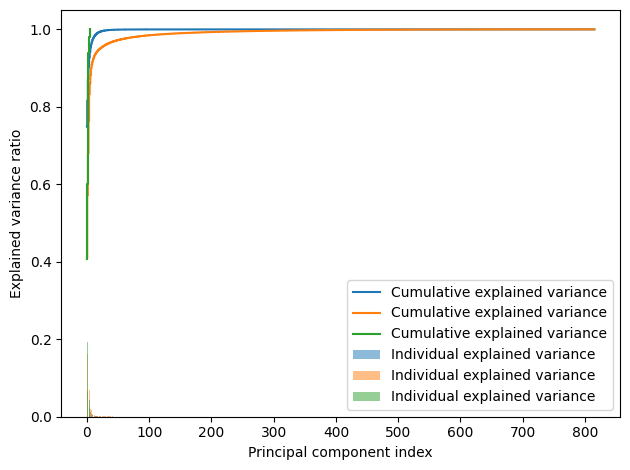

In [ ]:
chemical_multiverse('/content/study_case_2.xlsx', smiles_column_name='SMILES', ID='IDs', target_activities=['QED','Synth'], perplexity=7)